**Group project**

## Import Packages

In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from numpy.random import permutation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Plots
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import boxplot
from pandas.plotting import autocorrelation_plot

# Load & Pre-Process Data

In [2]:
test = pd.read_csv('/Users/lemon/Documents/Uni/4° semestre/Machine Learning/Challenge/test.csv')
train = pd.read_csv('/Users/lemon/Documents/Uni/4° semestre/Machine Learning/Challenge/train.csv').drop(columns=['w'])

assert test.isnull().sum().sum() == 0 and train.isnull().sum().sum() == 0 # check for missing values

train.describe, test.describe

(<bound method NDFrame.describe of              y         0         1         2         3         4         5  \
 0     0.483130  0.790980  0.702555  0.528220  0.298746  0.025488 -0.173480   
 1     1.135624  0.765286  0.604512  0.414197  0.241638  0.181862 -0.031920   
 2     0.686081  0.702834  0.637708  0.798416  0.755065  0.705225  0.535391   
 3    -1.342005  0.018378 -0.097297 -0.020850 -0.083325 -0.268512 -0.486335   
 4    -0.241418  0.463120  0.665307  0.446953  0.480780  0.392500  0.309231   
 ...        ...       ...       ...       ...       ...       ...       ...   
 7321  1.026517  1.002615  1.007519  0.990882  1.009554  1.009953  1.016928   
 7322  1.039843  1.067617  1.075324  1.068344  1.086520  1.088120  1.071688   
 7323  1.064836  0.976882  0.978272  0.972884  0.978098  0.977229  0.968538   
 7324  1.052061  0.851952  0.853579  0.871475  0.878525  0.882863  0.880152   
 7325  1.028131  1.155392  1.157401  1.144005  1.157401  1.157401  1.163429   
 
              6 

# Features and Targets Data Frames


In [3]:
train_df_targets = train['y']
train_df_features = train.drop(columns=['y'])

# Feature Scaling

In [4]:
#STANDARDIZATION
#not used as it gives better performance only in the svr method case
'''
sscaler = StandardScaler()

train_features_scaled = pd.DataFrame(sscaler.fit_transform(train.drop(columns=['y']))) #scaled train dataframe features
test_scaled = pd.DataFrame(sscaler.transform(test)) #scaled test dataframe

train_features_scaled.columns = train.drop(columns=['y']).columns #rename columns as they were before the scaling
test_scaled.columns = test.columns

train = train_features_scaled 
test = test_scaled

train_df_features = train

train = pd.concat([train_df_targets, train], axis=1) #rebuilding the train datafram with standardized features and raw y
'''

"\nsscaler = StandardScaler()\n\ntrain_features_scaled = pd.DataFrame(sscaler.fit_transform(train.drop(columns=['y']))) #scaled train dataframe features\ntest_scaled = pd.DataFrame(sscaler.transform(test)) #scaled test dataframe\n\ntrain_features_scaled.columns = train.drop(columns=['y']).columns #rename columns as they were before the scaling\ntest_scaled.columns = test.columns\n\ntrain = train_features_scaled \ntest = test_scaled\n\ntrain_df_features = train\n\ntrain = pd.concat([train_df_targets, train], axis=1) #rebuilding the train datafram with standardized features and raw y\n"

# Corr Matrix

In [5]:
corr_matrix = train.corr()
corr_matrix["y"].sort_values(ascending=False)

y     1.000000
49    0.977203
48    0.944832
47    0.898601
46    0.843251
31    0.831443
30    0.828819
32    0.826190
29    0.819507
33    0.808870
28    0.802625
45    0.790237
27    0.783774
34    0.779100
26    0.765639
44    0.745744
25    0.745667
35    0.743946
24    0.726833
23    0.715419
36    0.709549
43    0.708149
22    0.701411
21    0.688972
42    0.684724
20    0.683424
37    0.683334
18    0.681082
19    0.679991
17    0.677283
16    0.673230
41    0.670157
15    0.666290
38    0.664611
40    0.658175
14    0.657419
39    0.656926
13    0.642289
12    0.626453
2     0.621057
1     0.618793
3     0.614287
0     0.613172
11    0.612443
4     0.602994
10    0.601310
5     0.589865
9     0.588522
6     0.584518
7     0.580042
8     0.579152
Name: y, dtype: float64

# Split

In [6]:
train_set, test_set = train_test_split(train, test_size=0.25, random_state=100)

train_set_features = train_set.drop(columns=['y'])
train_set_features_f = train.drop(columns=['y'])
train_set_targets = train_set["y"]
train_set_targets_f= train["y"]

test_set_features = test_set.drop(columns=['y'])
test_set_targets = test_set['y']

# Data Visualization

<AxesSubplot:>

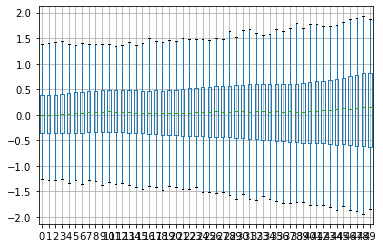

In [7]:
boxplot(train_df_features)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

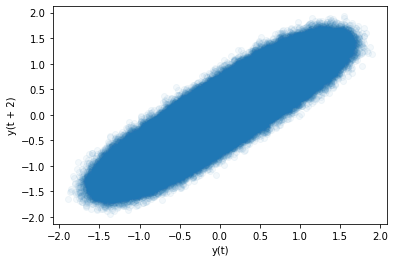

In [8]:
lag_plot(train_df_features.T, lag=2, alpha=0.05)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

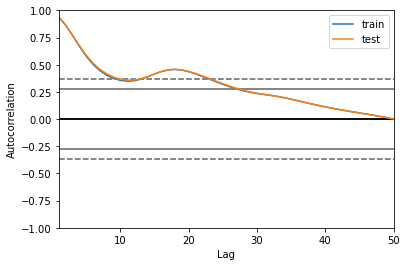

In [9]:
autocorrelation_plot(train_df_features.T, label='train')
autocorrelation_plot(test.T, label = 'test')

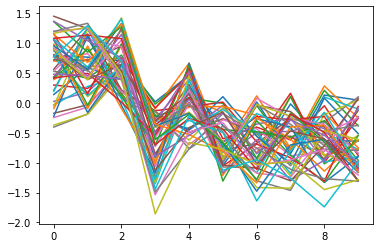

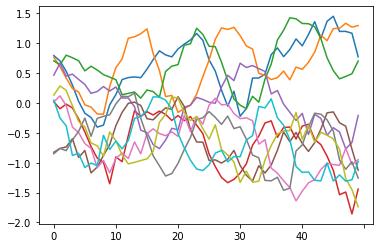

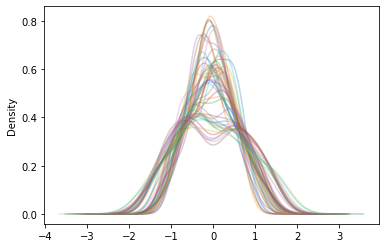

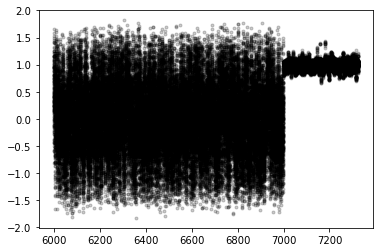

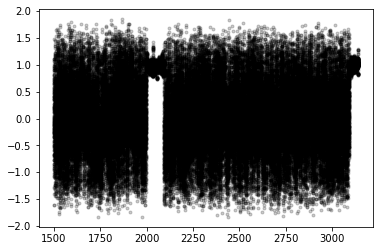

In [10]:
train_df_features.iloc[:10,:].plot().get_legend().remove()
train_df_features.iloc[:10,:].T.plot().get_legend().remove()

train_df_features.iloc[:100,:].plot(kind='kde', alpha=0.3).get_legend().remove()
train_df_features.iloc[6000:,:].plot(style='k.', alpha=0.2).get_legend().remove()
test.iloc[1500:,:].plot(style='k.', alpha=0.2).get_legend().remove()

# Linear Regression 




In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_set_features, train_set_targets)

LinearRegression()

# Assessing the performance (LR)





In [12]:
test_prediction_lr = lin_reg.predict(test_set_features)
train_prediction_lr = lin_reg.predict(train_set_features)


print("Test: ", np.sqrt(mean_squared_error(test_prediction_lr, test_set_targets)))
print("Test Random Predictions: ", np.sqrt(mean_squared_error(permutation(test_prediction_lr), test_set_targets)))
print("Train: ", np.sqrt(mean_squared_error(train_prediction_lr, train_set_targets)))
print("Train Random Predictions: ", np.sqrt(mean_squared_error(permutation(train_prediction_lr), train_set_targets)))

Test:  0.15103153768288394
Test Random Predictions:  1.2645013130027078
Train:  0.15068835901306452
Train Random Predictions:  1.2750288336606423


# Cross Validation: LR

In [13]:
lmCV = LinearRegression()

param_grid = {
  'fit_intercept':[True,False]
}
CV_olsmodel = GridSearchCV(estimator=lmCV, param_grid=param_grid, cv=10)
CV_olsmodel.fit(train_set_features, train_set_targets)
print(CV_olsmodel.best_params_)

{'fit_intercept': True}


In [14]:
lmCV = lmCV.set_params(**CV_olsmodel.best_params_)
lmCV.fit(train_set_features, train_set_targets)
train_prediction_lr_CV = lmCV.predict(train_set_features)
test_prediction_lr_CV = lmCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_lr_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_lr_CV, test_set_targets)))

Train (CV):  0.15068835901306452
Test (CV):  0.15103153768288394


# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
ridgeregCV = Ridge()

param_grid = {
  'alpha': [10,4,2,1.0,0.8,0.5,0.3,0.1,0.01]
}
CV_rrmodel = GridSearchCV(estimator=ridgeregCV, param_grid=param_grid, cv=10)
CV_rrmodel.fit(train_set_features, train_set_targets)
print(CV_rrmodel.best_params_)

{'alpha': 4}


In [16]:
ridgeregCV = ridgeregCV.set_params(**CV_rrmodel.best_params_)
ridgeregCV.fit(train_set_features, train_set_targets)
train_prediction_rr_CV = ridgeregCV.predict(train_set_features)
test_prediction_rr_CV = ridgeregCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_rr_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_rr_CV, test_set_targets)))

Train (CV):  0.15072266933031145
Test (CV):  0.15095452098668194


# KNearestNeighbors

In [17]:
kn = KNeighborsRegressor(n_neighbors = 9)
kn.fit(train_set_features, train_set_targets)

KNeighborsRegressor(n_neighbors=9)

# Assessing the Performance(KNN)

In [18]:
test_prediction_k = kn.predict(test_set_features)
print("Test", np.sqrt(mean_squared_error(test_set_targets, test_prediction_k)))

Test 0.1681040008566258


# Cross Validation: KNN

In [19]:
min_score = np.inf
for n_neighbors in range(1,20):
    kn = KNeighborsRegressor(n_neighbors = n_neighbors)
    scores = cross_val_score(kn, train_set_features, train_set_targets,
                         scoring="neg_mean_squared_error", cv=5)
    if -scores.mean() <= min_score:
      n_best = n_neighbors
      min_score = -scores.mean()
    
    print("N: {} Score: {} STD: {}".format(n_neighbors, -np.mean(scores), scores.std()))

print("best n_neighbors", n_best)

kn = KNeighborsRegressor(n_neighbors = n_best)
kn.fit(train_set_features, train_set_targets)
test_prediction_k = kn.predict(test_set_features)
print("Prediction", np.sqrt(mean_squared_error(test_set_targets, test_prediction_k)))

N: 1 Score: 0.05170376942029027 STD: 0.0013324477886885115
N: 2 Score: 0.03677365326904044 STD: 0.0010177469086817428
N: 3 Score: 0.03264949041800156 STD: 0.00039731123417823905
N: 4 Score: 0.03121009709241141 STD: 0.00019352462193572055
N: 5 Score: 0.030369673834810162 STD: 0.0004556517904215694
N: 6 Score: 0.02958649486353617 STD: 0.00032837400331393554
N: 7 Score: 0.02947107971025865 STD: 0.0004012984694162737
N: 8 Score: 0.029577953270977165 STD: 0.00038229364651339763
N: 9 Score: 0.029818181493913593 STD: 0.00035254373566456
N: 10 Score: 0.029775995934255395 STD: 0.0004192087135930547
N: 11 Score: 0.030026796078020467 STD: 0.0005870012133608675
N: 12 Score: 0.030295962190771342 STD: 0.00060851908548385
N: 13 Score: 0.030390153700968297 STD: 0.0007701672669378255
N: 14 Score: 0.030421952793026574 STD: 0.000723453396431792
N: 15 Score: 0.030728518307274737 STD: 0.0006296345249189671
N: 16 Score: 0.030707982667187356 STD: 0.0004745296745635554
N: 17 Score: 0.03080942792903179 STD: 0.

# Decision Tree


In [20]:
tree_reg = DecisionTreeRegressor(random_state=100)
tree_reg.fit(train_set_features, train_set_targets)

DecisionTreeRegressor(random_state=100)

# Assessing the performance (Decision Tree)

In [21]:
predictions = tree_reg.predict(test_set_features)
tree_mse = mean_squared_error(test_set_targets, predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.21006792449171902


# Lasso

In [51]:
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
reg = linear_model.Lasso(alpha=0.0000001)
reg.fit(train_set_features, train_set_targets)

test_prediction_l = reg.predict(test_set_features)
print("Prediction", np.sqrt(mean_squared_error(test_set_targets, test_prediction_l)))


Prediction 0.15103181071265415


# Support Vector Regression

In [23]:
svr_rbf = SVR(kernel='rbf', C=2, gamma=0.025)
svr_rbf.fit(train_set_features, train_set_targets)

SVR(C=2, gamma=0.025)

In [24]:
test_prediction_svr = svr_rbf.predict(test_set_features)
train_prediction_svr = svr_rbf.predict(train_set_features)


print("Test: ", np.sqrt(mean_squared_error(test_prediction_svr, test_set_targets)))
print("Train: ", np.sqrt(mean_squared_error(train_prediction_svr, train_set_targets)))


Test:  0.13632838542404951
Train:  0.1247344277364881


# Cross Validation SVR

In [29]:
svr = SVR()

kernel_opt = ['rbf', 'linear']
c_range = [2, 5]
epsilon_range = [0.025, 0.075]
gamma_range = [0.01, 0.025, 0.075]

param_grid = {
  'kernel':   kernel_opt,
  'C':        c_range,
  'epsilon':  epsilon_range,
  'gamma' :   gamma_range
}
svr_CV = GridSearchCV(svr, param_grid=param_grid, cv=5, verbose=3)
svr_CV.fit(train_set_features, train_set_targets)
print(svr_CV.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .....C=2, epsilon=0.025, gamma=0.01, kernel=rbf; total time=   1.9s
[CV 2/5] END .....C=2, epsilon=0.025, gamma=0.01, kernel=rbf; total time=   2.0s
[CV 3/5] END .....C=2, epsilon=0.025, gamma=0.01, kernel=rbf; total time=   1.9s
[CV 4/5] END .....C=2, epsilon=0.025, gamma=0.01, kernel=rbf; total time=   1.9s
[CV 5/5] END .....C=2, epsilon=0.025, gamma=0.01, kernel=rbf; total time=   1.9s
[CV 1/5] END ..C=2, epsilon=0.025, gamma=0.01, kernel=linear; total time=   4.8s
[CV 2/5] END ..C=2, epsilon=0.025, gamma=0.01, kernel=linear; total time=   4.9s
[CV 3/5] END ..C=2, epsilon=0.025, gamma=0.01, kernel=linear; total time=   4.7s
[CV 4/5] END ..C=2, epsilon=0.025, gamma=0.01, kernel=linear; total time=   4.9s
[CV 5/5] END ..C=2, epsilon=0.025, gamma=0.01, kernel=linear; total time=   4.8s
[CV 1/5] END ....C=2, epsilon=0.025, gamma=0.025, kernel=rbf; total time=   2.0s
[CV 2/5] END ....C=2, epsilon=0.025, gamma=0.02

In [30]:
svr = svr.set_params(**svr_CV.best_params_)
svr.fit(train_set_features, train_set_targets)

train_prediction_svr_CV = svr.predict(train_set_features)
test_prediction_svr_CV = svr.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_svr_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_svr_CV, test_set_targets)))

Train (CV):  0.11611150031094274
Test (CV):  0.13585385092420507


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
RForregCV = RandomForestRegressor(random_state=0)

param_grid = {
  'max_depth': [ 6., 15., 30., 50.],
  'n_estimators': [ 10,  100, 150, 200]
}

CV_rfmodel = GridSearchCV(RForregCV, param_grid=param_grid, cv=5)
CV_rfmodel.fit(train_set_features, train_set_targets)
print(CV_rfmodel.best_params_)

{'max_depth': 50.0, 'n_estimators': 200}


In [33]:
RForregCV = RForregCV.set_params(**CV_rfmodel.best_params_)
RForregCV.fit(train_set_features, train_set_targets)
train_prediction_rf_CV = RForregCV.predict(train_set_features)
test_prediction_rf_CV = RForregCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_rf_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_rf_CV, test_set_targets)))

Train (CV):  0.055994858169290194
Test (CV):  0.1498971338856758


# MLP Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore")

# finding optimal parameters
MLPregCV = MLPRegressor(random_state=42)

param_grid = {
 'learning_rate': ["constant", "invscaling", "adaptive"],
 'solver' : ['lbfgs', 'sgd', 'adam'],
 'hidden_layer_sizes': [(62,), (64,), (63,)],
 'alpha': [1.2, 1.4,1.6, 1.5],
 'activation': ["logistic", "relu", "tanh"]
}
CV_MLPmodel = GridSearchCV(MLPregCV, param_grid=param_grid, cv=5)
CV_MLPmodel.fit(train_set_features, train_set_targets)
print(CV_MLPmodel.best_params_)

In [47]:
import warnings
warnings.filterwarnings("ignore")

MLPregCV = MLPregCV.set_params(**CV_MLPmodel.best_params_)
MLPregCV.fit(train_set_features, train_set_targets)

train_prediction_nn_CV = MLPregCV.predict(train_set_features)
test_prediction_nn_CV = MLPregCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_nn_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_nn_CV, test_set_targets)))

Train (CV):  0.1284819719207712
Test (CV):  0.13101365443967672


# Bidirectional Stacked LSTM

In [38]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense

Using TensorFlow backend.


In [39]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [40]:
ft_len = len(train_df_features)
dataset = np.array(train_df_features[:ft_len].T)

n_steps = 8
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

n_features = X.shape[2]

# define model
lstm = Sequential()
lstm.add(Bidirectional( LSTM( 64, activation='relu', return_sequences=True,
                             input_shape=(n_steps, n_features) ) ))
lstm.add(LSTM(128, activation='relu'))
lstm.add(Dense(n_features))
lstm.compile(optimizer='adam', loss='mse')

# fit model
lstm.fit(X, y, epochs=200, steps_per_epoch=5, verbose=0)

# prediction
x_input = dataset[-n_steps:].reshape((1, n_steps, n_features))
yhat = lstm.predict(x_input, verbose=0).reshape(ft_len)

print(yhat, np.array(train_df_targets[:ft_len]))
print("Test: ", np.sqrt(mean_squared_error(yhat, np.array(train_df_targets[:ft_len]))))

(42, 8, 7326) (42, 7326)
[0.6240404 1.1806159 0.6712649 ... 1.1283886 1.1182708 1.0908964] [0.48313004 1.13562417 0.68608099 ... 1.06483572 1.05206068 1.02813128]
Test:  0.1939805330683539


# Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
GBoostregCV = GradientBoostingRegressor(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = {
  'max_depth': [ 3., 4., 5.],
  'subsample': [0.7, 0.8, 0.9],
  'n_estimators': [50, 100,150],
  'learning_rate': [0.1, 0.2, 0.3]
}
CV_gbmodel = GridSearchCV(estimator=GBoostregCV, param_grid=param_grid, cv=10)
CV_gbmodel.fit(train_set_features, train_set_targets)
print(CV_gbmodel.best_params_)

{'learning_rate': 0.1, 'max_depth': 5.0, 'n_estimators': 150, 'subsample': 0.8}


In [42]:
GBoostregCV = GBoostregCV.set_params(**CV_gbmodel.best_params_)
GBoostregCV.fit(train_set_features, train_set_targets)

train_prediction_gb_CV = GBoostregCV.predict(train_set_features)
test_prediction_gb_CV = GBoostregCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_gb_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_gb_CV, test_set_targets)))

Train (CV):  0.09383673145299379
Test (CV):  0.14795276803958535


# LSTM Vanilla

In [ ]:
train_targets_n=train_set_targets.to_numpy()
train_features_n=train_set_features.to_numpy()
y=train_targets_n
X=train_features_n

n_steps=50
n_features=1
X=X.reshape(X.shape[0], X.shape[1], n_features)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=100, verbose=0)

x_input = train_features_n[len(train_features_n)-1]
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_features_n=test_set_features.to_numpy()
Xn=test_features_n
Xn=Xn.reshape(Xn.shape[0], Xn.shape[1], n_features)


from sklearn.metrics import mean_squared_error

error=mean_squared_error(model.predict(Xn), test_set_targets)

print(error)

# ARIMA



```
# N.B: the following code takes a couple of hours

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
 
 
test_arima = pd.read_csv('/content/test.csv')
test_feature_arima = test_arima.drop(columns ='49').T
test_targets_arima = test_arima['49'].T
test_arima = test_arima.T
 
# evaluating the arima model on a given time series and with a given set of hyperparameters
def evaluate_arima_model(test_feature_arima, m , order):
    arma_mod = ARIMA(test_feature_arima[m], order=order, enforce_stationarity=False).fit()
    pred_value = arma_mod.forecast()
    prediction = [pred_value[49]]
    a = np.sqrt((test_targets_arima[m] - prediction)**2)
    return a ,prediction
 
# implementing a grid search approach to find the best hyperparameters for a given time series
def evaluate_models(test_feature_arima, m, p_values, d_values, q_values):
    test_feature = test_feature_arima.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                mod = evaluate_arima_model(test_feature_arima, m, order)
                mse = mod[0]
                if mse < best_score:
                    best_score, best_cfg = mse, order
                if mse <= 0.1:
                    break
    return best_cfg
 
# final predictions
def arma_stat_final(test, ini, fin):
    prediction = []
    opt = []
    for x in range(ini,fin):
        n = evaluate_models(test_feature_arima, x, [1,2,3,4,5], [0,1,2,3], [1,2,3,4,5])
        arma_mod = ARIMA(test[x], order=n, enforce_stationarity=False).fit()
        pred_value = arma_mod.forecast()
        p = [pred_value[50]]
        prediction += p
        opt += [n]
        print(f'steps missing = {fin-x-1}, index = {x}')
    return prediction
 
prediction = arma_stat_final(test,0, 3141)


```



# Final Modelling

In [49]:
# MLP Neural Network
from sklearn.neural_network import MLPRegressor


MLPRreg = MLPRegressor(activation= 'tanh', solver='lbfgs', alpha= 1.5, hidden_layer_sizes= (64,), learning_rate= 'constant')
MLPRreg.fit(train_df_features, train_df_targets)
MLPRreg.score(train_df_features, train_df_targets)

0.9804063934271164

# Test DataFrame Prediction

In [50]:
# Neural Networks
test_df_predictions = MLPRreg.predict(test) #actual prediction on the test dataframe, not the test set resulted from the split in the train dataframe
np.savetxt("test_predictions.txt", test_df_predictions, delimiter=",")